#### The basic idea is analyzing the <font color='Red'>Business Problem of zomato</font> to get fair idea about the factors affecting the establishment of different types of restaurents at different places of Banglore, aggregate rating of each restaurent and many more. 

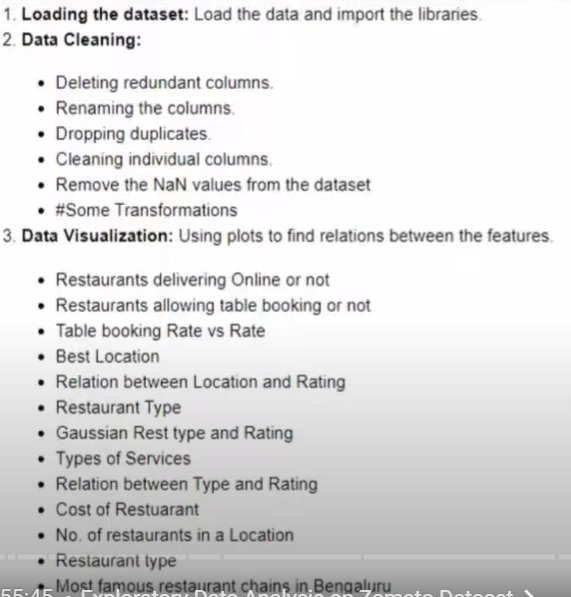

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\HP\\Desktop\\Internship\\Zomato EDA\\archive\\zomato.csv')

In [3]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
#deleting unnecessary columns
#dropping the column 'dish_liked','url','phone' and creating new dataframe df1
df1=df.drop(['dish_liked','url','phone'],axis=1)

In [7]:
df1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
#Removing the duplicated from the data
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [9]:
df1.duplicated().sum()

43

In [10]:
df1.drop_duplicates(inplace=True)

In [11]:
#Removing the NaN values from the dataset
df1.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [12]:
df1.shape

(51674, 14)

In [13]:
df1.dropna(how='any',inplace=True)

In [14]:
df1.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [15]:
df1.shape

(43499, 14)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [17]:
#Reading the column names
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [18]:
#changing the column names for those columns whose names are large
df1=df1.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                        'listed_in(city)':'city'})
df1.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [19]:
df1.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [20]:
#transformation of cost feature
#changing the cost to string
df1.cost=df1.cost.astype(str)

In [21]:
type(df1['cost'][0])

str

In [22]:
#using lambda fuction we will remove , from cost column
df1.cost=df1.cost.apply(lambda x: x.replace(',',''))

In [23]:
df1.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [24]:
#changing cost to float
df1.cost=df1.cost.astype(float)
df1.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130., 1700., 1400., 1350., 2200., 2000., 1800., 1900.,
        180.,  330., 2500., 2100., 3000., 2800., 3400.,   50.,   40.,
       1250., 3500., 4000., 2400., 2600., 1450.,   70., 3200.,  560.,
        240.,  360., 6000., 1050., 2300., 4100.,  120., 5000., 3700.,
       1650., 2700., 4500.])

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.0+ MB


In [26]:
#exploring 'rate' feature in dataset
df1.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [27]:
df1=df1.loc[df1.rate !='NEW']
df1=df1.loc[df1.rate !='-']

In [28]:
df1.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [29]:
#one way of removing /5 and after removing /5 converting them to float
#df1['rate'] = df1['rate'].apply(lambda x: (float(x.split('/')[0])))

In [30]:
#df1.rate.unique()

In [31]:
#type(df1.rate[0])

In [32]:
#other way of removing /5 and converting them to float
remove_slash=lambda x:x.replace('/5','')
df1.rate=df1.rate.apply(remove_slash)


In [33]:
df1.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [34]:
type(df1.rate[0])

str

In [35]:
df1.rate=df1.rate.apply(lambda x: x.strip())

In [36]:
df1.rate.astype(float)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41237, dtype: float64

In [37]:
df1.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [38]:
df1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [39]:
df1.tail()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental",1500.0,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [40]:
#adjusting column names
df1.name=df1.name.apply(lambda x:x.title())

In [41]:
df1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [42]:
df1.tail()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental",1500.0,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [43]:
#converting values 'yes' or 'no' to boolean form i.e. 1 and 0 in online_order and book_table column
df1.online_order.replace(('Yes','No'),(True,False),inplace=True)
df1.book_table.replace(('Yes','No'),(True,False),inplace=True)

In [44]:
df1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


more details about factorize()[0] visit below  
https://datascience.stackexchange.com/questions/44387/reg-pandas-factorize  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html#pandas.factorize

In [45]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate','cost','votes'])]:
        zomato[column]=zomato[column].factorize()[0]
    return zomato
df2=Encode(df1.copy())

In [46]:
df2

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,3137,2699,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
51711,8791,1716,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
51712,8725,6532,1,1,3.6,27,25,17,240,1500.0,20956,0,6,29
51715,8786,6568,1,0,4.3,236,56,17,237,2500.0,21054,0,6,29


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

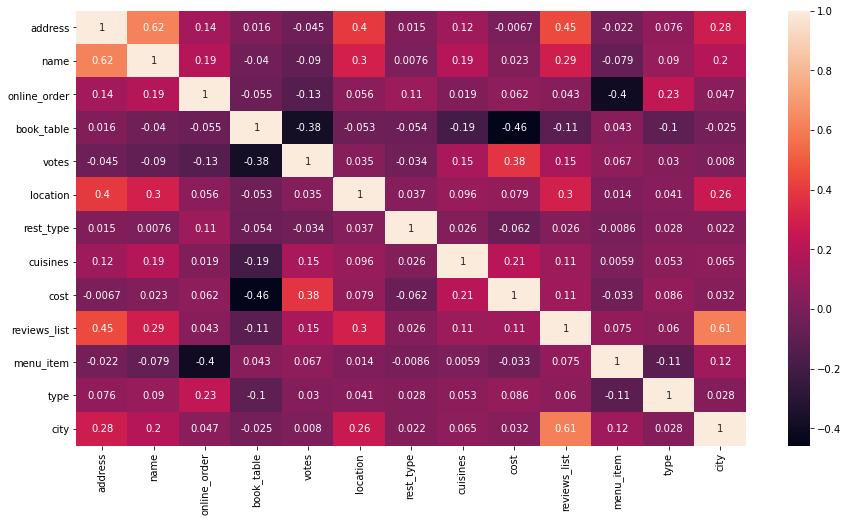

In [47]:
#get correlation between different varaibles
corr=df2.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
df2.columns

The highest correlation is between name and address 0.62, which is not very much concern

## Data visualization

### Restaurants delivering online food or not

<AxesSubplot:xlabel='online_order', ylabel='count'>

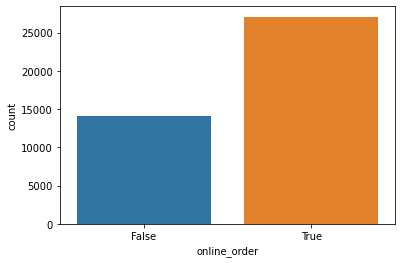

In [48]:
#Restaurants delivering online or not
sns.countplot(x='online_order',data=df1)

<AxesSubplot:title={'center':'Restaurants delvering online or not'}, xlabel='online_order', ylabel='count'>

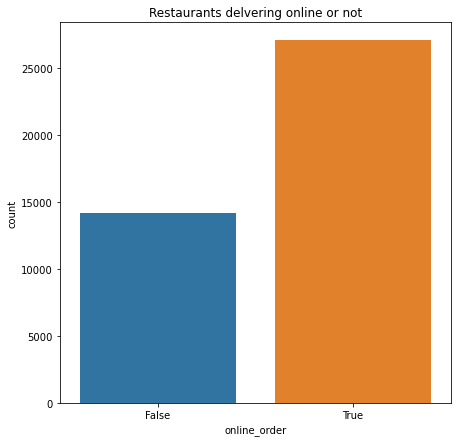

In [49]:
#some modifications
plt.figure(figsize=(7,7))
plt.title("Restaurants delvering online or not")
sns.countplot(x='online_order',data=df1)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants delvering online or not')

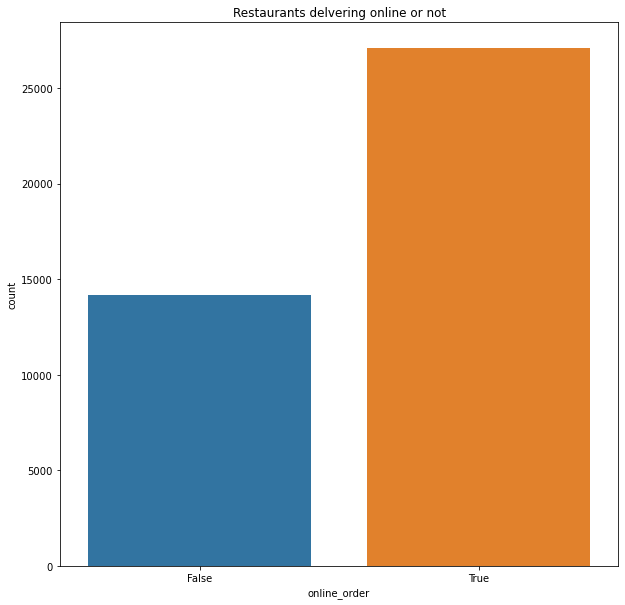

In [50]:
#some modifications
sns.countplot(df1['online_order'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Restaurants delvering online or not")

In [51]:
df1.groupby('online_order').count()

,address,name,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
online_order,,,,,,,,,,,,,
False,14156,14156,14156,14156,14156,14156,14156,14156,14156,14156,14156,14156,14156
True,27081,27081,27081,27081,27081,27081,27081,27081,27081,27081,27081,27081,27081


In [52]:
df1.groupby('online_order').online_order.count()

online_order
False    14156
True     27081
Name: online_order, dtype: int64

### Restaurants allowing table booking or not

<AxesSubplot:title={'center':'Booking table is allowed or not'}, xlabel='book_table', ylabel='count'>

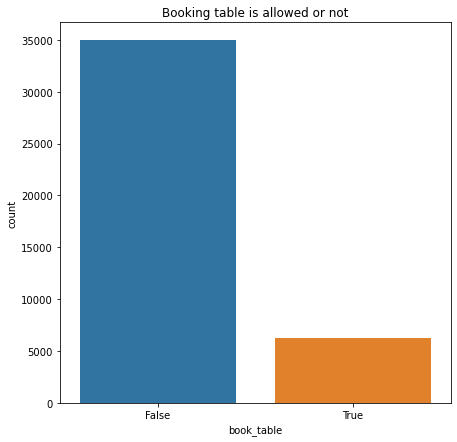

In [53]:
plt.figure(figsize=(7,7))
plt.title("Booking table is allowed or not")
sns.countplot(x='book_table',data=df1)

In [54]:
df1.groupby('book_table').online_order.count()

book_table
False    34938
True      6299
Name: online_order, dtype: int64

### Booking table vs rate

In [55]:

Y=pd.crosstab(df1.rate,df1.book_table)
Y

book_table,False,True
rate,,
1.8,5,0
2.0,11,0
2.1,24,0
2.2,13,13
2.3,51,0
2.4,66,0
2.5,98,2
2.6,245,4
2.7,299,4


In [56]:
Y.div(10)

book_table,False,True
rate,,
1.8,0.5,0.0
2.0,1.1,0.0
2.1,2.4,0.0
2.2,1.3,1.3
2.3,5.1,0.0
2.4,6.6,0.0
2.5,9.8,0.2
2.6,24.5,0.4
2.7,29.9,0.4


In [57]:
Y.sum()

book_table
False    34938
True      6299
dtype: int64

In [58]:
Y.div(Y.sum())

book_table,False,True
rate,,
1.8,0.000143,0.000000
2.0,0.000315,0.000000
2.1,0.000687,0.000000
2.2,0.000372,0.002064
2.3,0.001460,0.000000
2.4,0.001889,0.000000
2.5,0.002805,0.000318
2.6,0.007012,0.000635
2.7,0.008558,0.000635


In [59]:
Y.div(Y.sum(),axis=0)

book_table,False,True
1.8,NaN,NaN
2.0,NaN,NaN
2.1,NaN,NaN
2.2,NaN,NaN
2.3,NaN,NaN
2.4,NaN,NaN
2.5,NaN,NaN
2.6,NaN,NaN
2.7,NaN,NaN
2.8,NaN,NaN


In [60]:
Y.sum(1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      66
2.5     100
2.6     249
2.7     303
2.8     580
2.9     801
3.0     990
3.1    1550
3.2    1844
3.3    2272
3.4    2444
3.5    2763
3.6    3286
3.7    3807
3.8    3816
3.9    3954
4.0    3144
4.1    2925
4.2    2154
4.3    1682
4.4    1146
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [61]:
Y.div(Y.sum(1))

,False,True,1.8,2.0,2.1,2.2,2.3,2.4,2.5,2.6,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
rate,,,,,,,,,,,,,,,,,,,,,
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
Y.div(Y.sum(1),axis=0)

book_table,False,True
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,1.000000,0.000000
2.2,0.500000,0.500000
2.3,1.000000,0.000000
2.4,1.000000,0.000000
2.5,0.980000,0.020000
2.6,0.983936,0.016064
2.7,0.986799,0.013201


<AxesSubplot:xlabel='rate'>

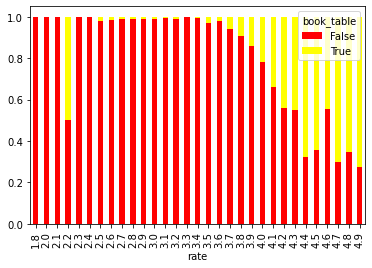

In [63]:
Y.div(Y.sum(1),axis=0).plot(kind='bar',stacked=True,color=['red','yellow'])

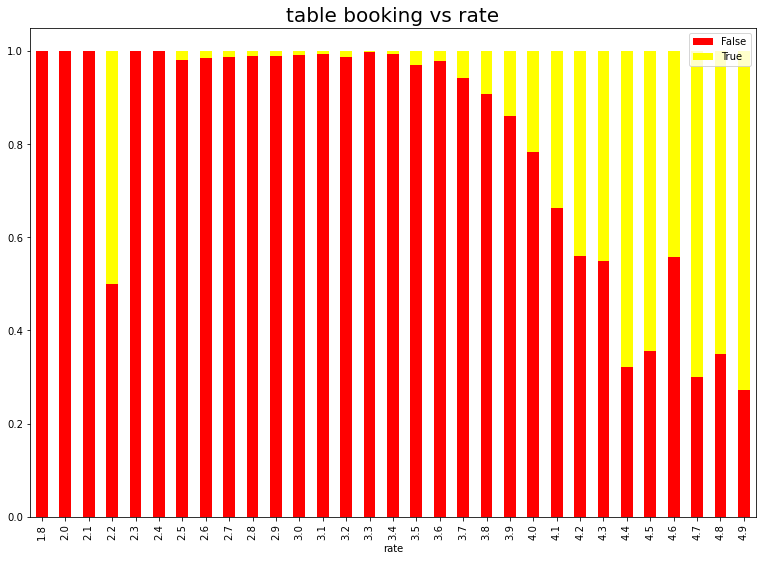

In [64]:
#plt.figure(figsize=(13,9)) This does not work here
plt.rcParams['figure.figsize']=(13,9)
Y.div(Y.sum(1),axis=0).plot(kind='bar',stacked=True,color=['red','yellow'])
plt.title('table booking vs rate',fontsize=20)

plt.legend(loc='upper right')


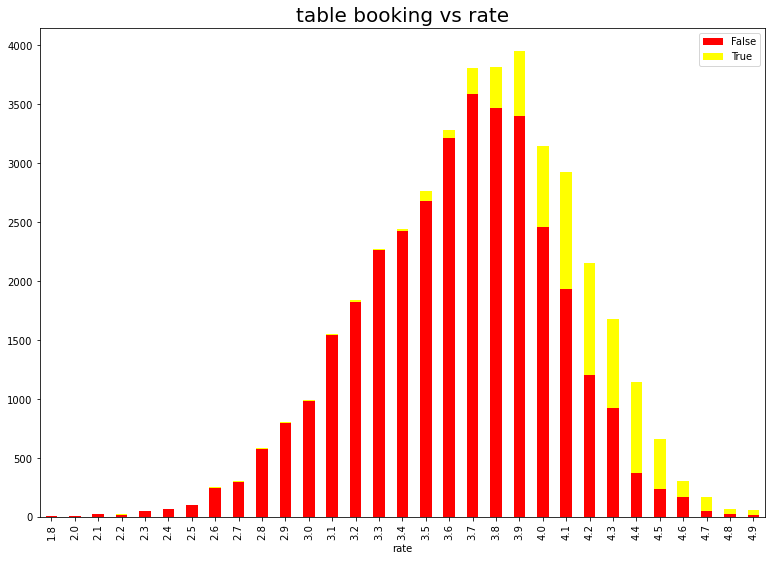

In [65]:
plt.rcParams['figure.figsize']=(13,9)
Y.plot(kind='bar',stacked=True,color=['red','yellow'])
plt.title('table booking vs rate',fontsize=20)

plt.legend(loc='upper right')

### Location

<AxesSubplot:xlabel='city', ylabel='count'>

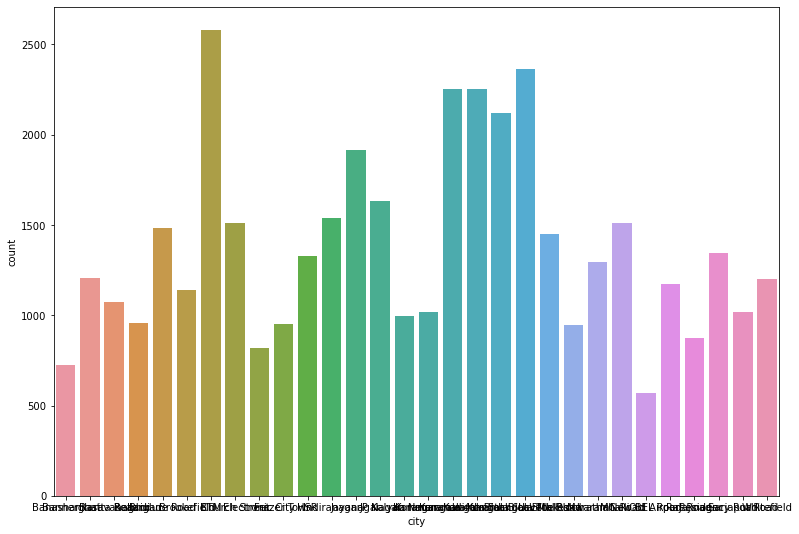

In [66]:
sns.countplot(x='city',data=df1)

Text(0.5, 1.0, 'Location')

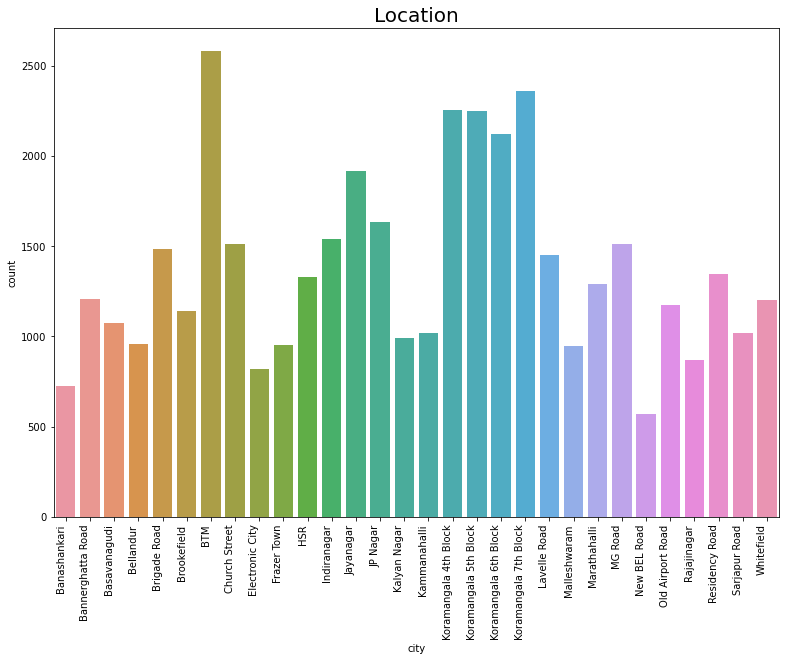

In [67]:
plt.rcParams['figure.figsize']=(13,9)
sns.countplot(x='city',data=df1).set_xticklabels(sns.countplot(x='city',data=df1).get_xticklabels(),rotation=90,ha='right')
plt.title("Location",fontsize=20)

### Location and Rating

In [68]:
loc_plt=pd.crosstab(df1.rate,df1.city)
loc_plt.head()

city,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
rate,,,,,,,,,,,,,,,,,,,,,
1.8,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2.0,0,0,0,0,0,2,0,2,0,0,...,1,2,0,2,0,0,0,2,0,0
2.1,0,0,0,0,2,1,4,1,0,1,...,1,1,0,6,0,0,0,0,3,0
2.2,2,0,2,0,1,3,3,3,0,1,...,2,3,0,0,0,0,0,2,0,0
2.3,4,0,3,0,4,1,2,1,0,0,...,2,1,2,2,0,0,2,3,4,0


<AxesSubplot:xlabel='rate'>

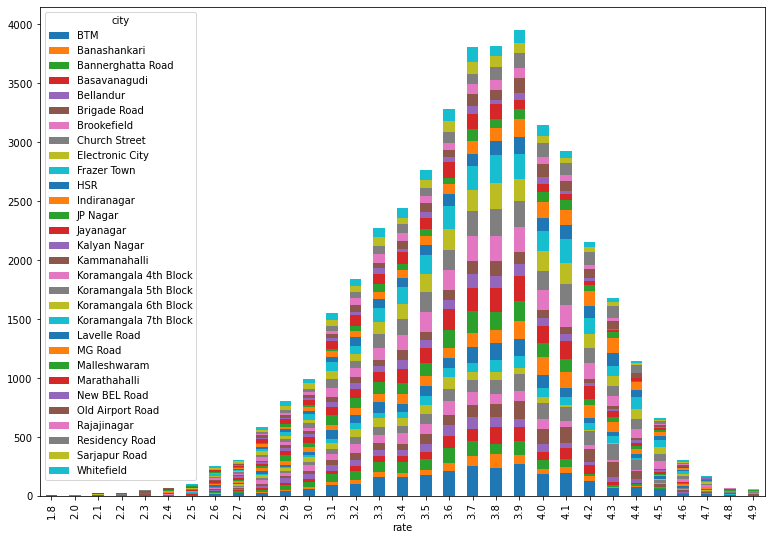

In [69]:
loc_plt.plot(kind='bar',stacked=True)

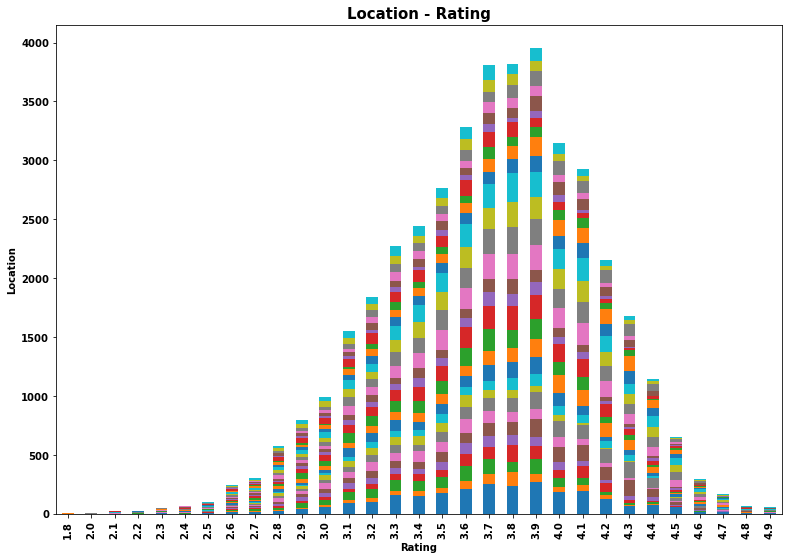

In [70]:
#Location and Rating
loc_plt=pd.crosstab(df1['rate'],df1['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()

### Restaurant Type

Text(0.5, 1.0, 'Restuarant Type')

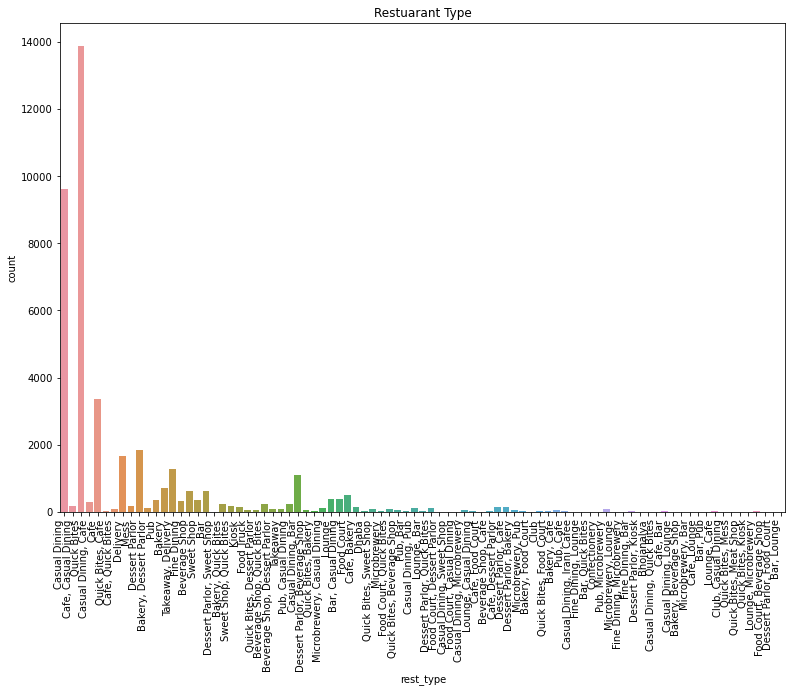

In [71]:

sns.countplot(x='rest_type',data=df1).set_xticklabels(sns.countplot(x='rest_type',data=df1).get_xticklabels(), rotation=90, ha="right")


plt.title('Restuarant Type')

### Gaussian Restaurant type and Rating

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

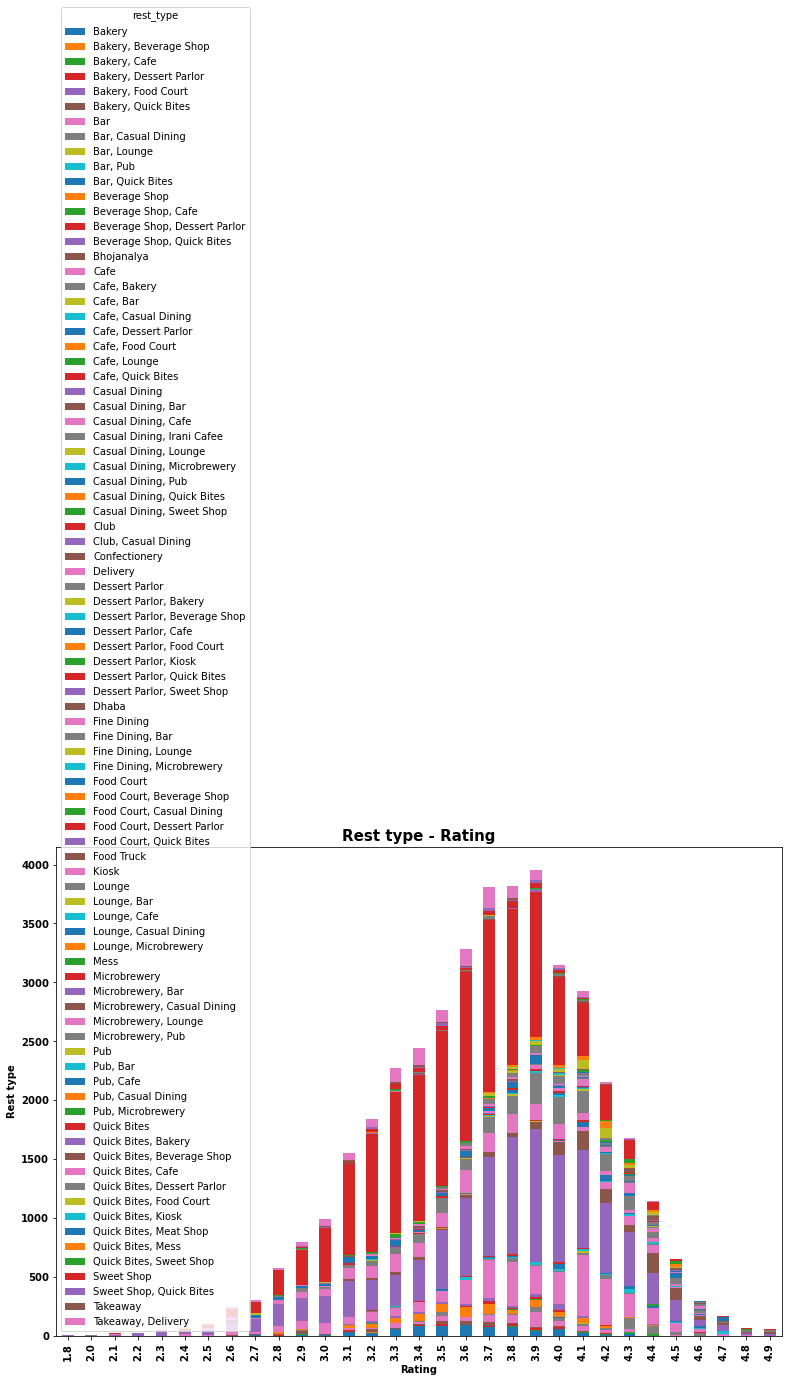

In [72]:
loc_plt=pd.crosstab(df1['rate'],df1['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')


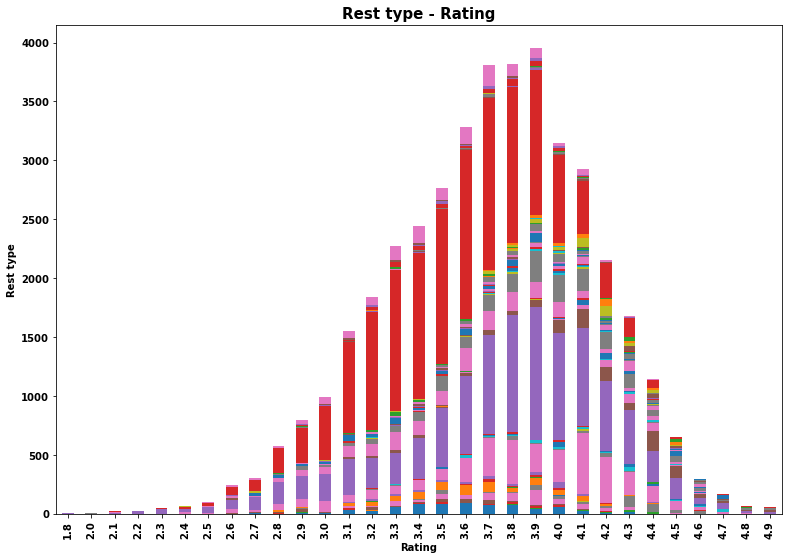

In [73]:
#Gaussian Rest type and Rating
loc_plt=pd.crosstab(df1['rate'],df1['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()

In [74]:
df1.groupby('rest_type').rest_type.count()

rest_type
Bakery                      704
Bakery, Beverage Shop         1
Bakery, Cafe                 72
Bakery, Dessert Parlor      127
Bakery, Food Court            2
                           ... 
Quick Bites, Sweet Shop      75
Sweet Shop                  346
Sweet Shop, Quick Bites     171
Takeaway                     79
Takeaway, Delivery         1278
Name: rest_type, Length: 87, dtype: int64

In [75]:
grp=df1.groupby('rest_type').rest_type.count()

In [76]:
grp.sort_values(ascending=False)

rest_type
Quick Bites                  13871
Casual Dining                 9608
Cafe                          3368
Dessert Parlor                1850
Delivery                      1666
                             ...  
Bakery, Food Court               2
Cafe, Food Court                 2
Food Court, Beverage Shop        2
Bakery, Beverage Shop            1
Quick Bites, Kiosk               1
Name: rest_type, Length: 87, dtype: int64

In [77]:
grp.max()

13871

In [78]:
grp1=grp[grp>13000]
grp1

rest_type
Quick Bites    13871
Name: rest_type, dtype: int64

### Types of Services

Text(0.5, 1.0, 'Type of Service')

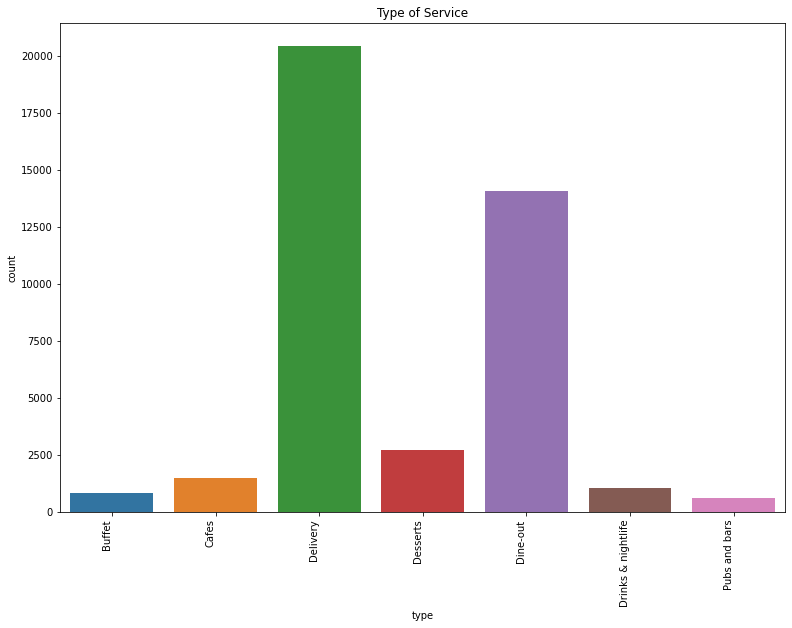

In [79]:
#Types of Services

sns.countplot(x='type',data=df1).set_xticklabels(sns.countplot(x='type',data=df1).get_xticklabels(), rotation=90, ha="right")

plt.title('Type of Service')

### Type and Rating

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

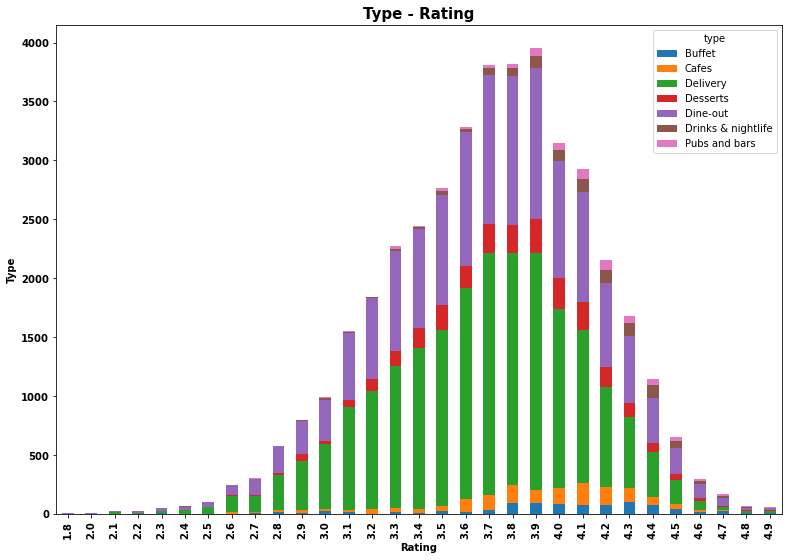

In [80]:
#Type and Rating
type_plt=pd.crosstab(df1['rate'],df1['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

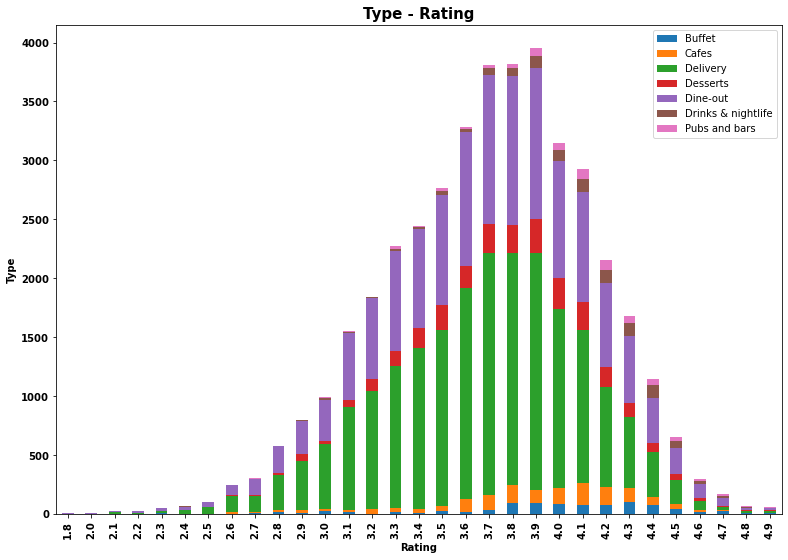

In [81]:
type_plt=pd.crosstab(df1['rate'],df1['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend()

### Cost of Restaurant

Text(0.5, 1.0, 'Cost of Restuarant')

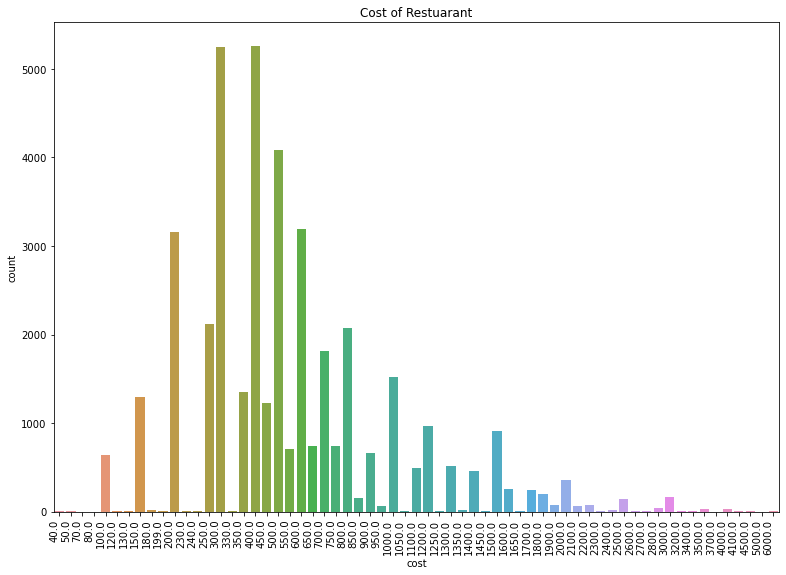

In [82]:

sns.countplot(x='cost',data=df1).set_xticklabels(sns.countplot(x='cost',data=df1).get_xticklabels(), rotation=90, ha="right")

plt.title('Cost of Restuarant')

In [83]:
grp=df1.groupby('cost').cost.count()

In [84]:
grp.sort_values(ascending=False)

cost
400.0     5261
300.0     5242
500.0     4080
600.0     3189
200.0     3163
          ... 
6000.0       2
80.0         1
3700.0       1
70.0         1
5000.0       1
Name: cost, Length: 63, dtype: int64

### Number of restaurants in a Location

Text(0.5, 1.0, 'Number of restaurants in a Location')

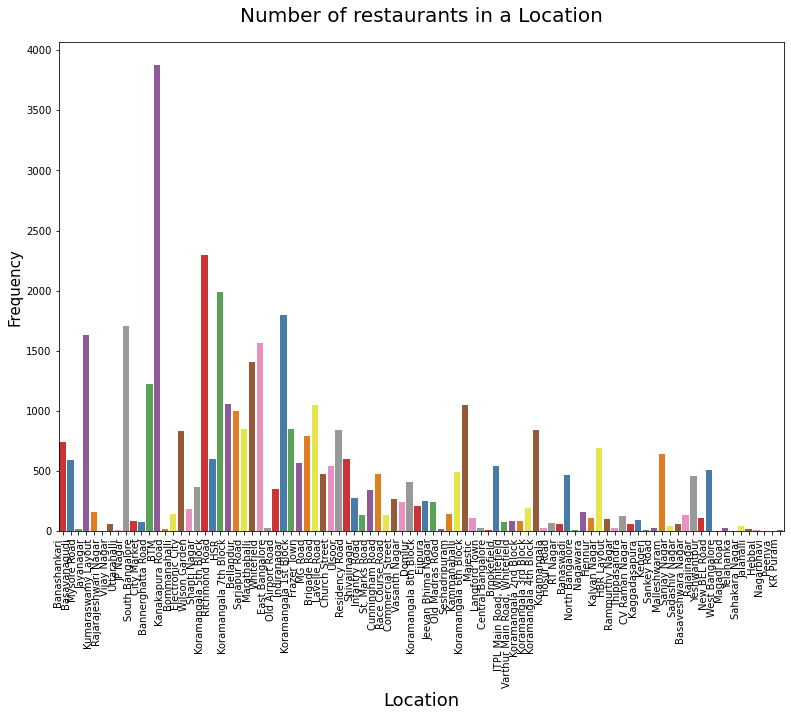

In [85]:
#fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df1, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)

plt.title('Number of restaurants in a Location',size = 20,pad=20)

In [86]:
grp=df1.groupby('location').location.count()
grp.sort_values(ascending=False)

location
BTM                      3873
Koramangala 5th Block    2296
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

### Restuarant Type

Text(0.5, 1.0, 'Restaurant types')

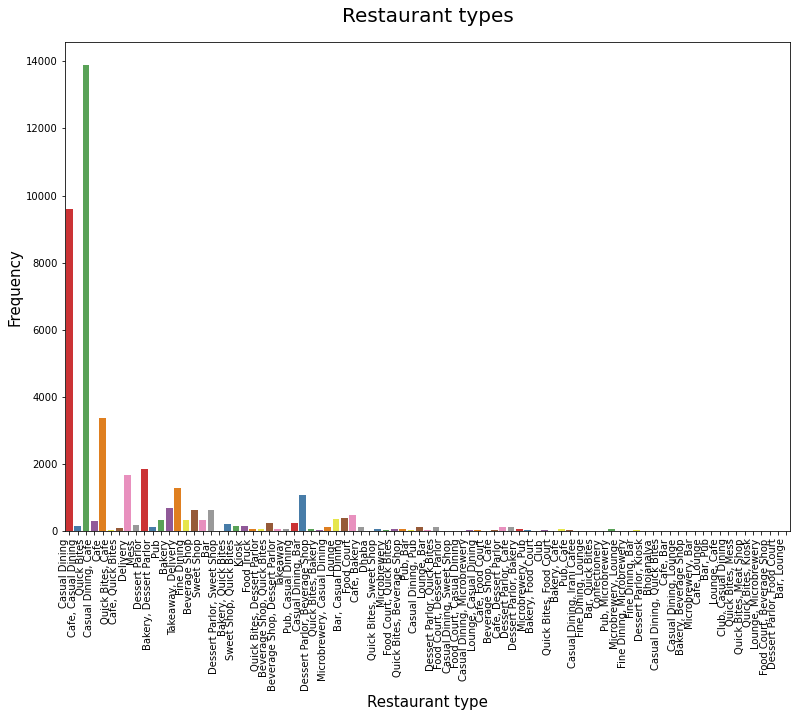

In [87]:

rest = sns.countplot(x="rest_type",data=df1, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

### Most famous restaurant chains in Bangalore

In [88]:

chains=df1['name'].value_counts()[:5]
chains

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Just Bake            68
Five Star Chicken    68
Name: name, dtype: int64

In [89]:
chains=df1['name'].value_counts()[:20]#first 20 restuarants with highest outlet
chains

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Just Bake            68
Five Star Chicken    68
Kanti Sweets         68
Baskin Robbins       62
Kfc                  60
Pizza Hut            60
Petoo                60
Domino'S Pizza       59
Mcdonald'S           59
Subway               59
Smoor                59
Sweet Truth          58
Polar Bear           58
Beijing Bites        56
Faasos               56
Burger King          55
Keventers            54
Name: name, dtype: int64

In [90]:
chains=df1['name'].value_counts(ascending=True)[:20]
chains

Royal Biriyani House        1
Panchamuki Fastfood         1
Nukkad Box                  1
Tango                       1
Om Sai Skanda Dosa Camp     1
Svadu Sweets & Savouries    1
Banashankari Restaurant     1
Kia'S Kitchen               1
Therpup - A Dog Cafe        1
Ginger                      1
Nanna Munna                 1
Hotel Elite                 1
Nature'S Nectar             1
Sooperolls                  1
Fresh Dinner                1
Karnataka Briyani Point     1
Hunger Genie                1
Latitude - Tulip Inn        1
Food Court                  1
Nellore Dosa Camp           1
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

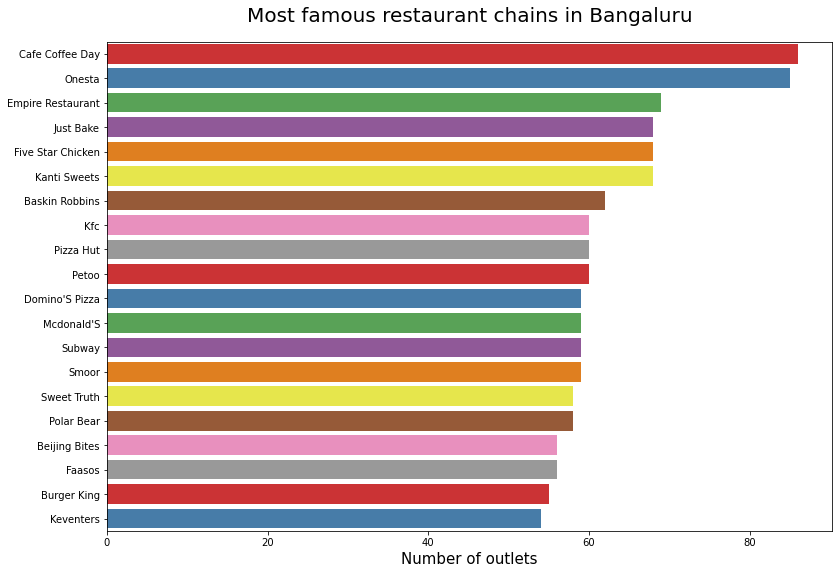

In [91]:
chains=df1['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)